## Loi de Von mises :

La densité est définie sur $[0, 2\pi[$ par
$ f(x) = \frac {e^{\kappa cos(\theta - m)}}{2 \pi I_{0}(\kappa)} ~$  
avec  $~ \kappa = \frac {1}{\sigma^{2}} $

L'orientation est définie sur $[0, \pi[$ par un remplaçant de la variable $~ (\theta_d - m) ~$ par $~ 2(\theta_o - m)$

nous obtenons alors la densité pour $\theta_o$:
$ f(x) = \frac{1}{2 \pi I_{0}(\kappa)} \cdot {e^{\frac{cos(2(\theta - m))}{\sigma^{2}}}}$
et 
$~ p = \frac {1} {2\pi \sigma_1 \sigma_2} \cdot e^{- 2 \frac{(m_2-m_1)^{2}}{\sigma_{1}^{2} + \sigma_{2}^{2}}}$

car avec le changement de variable :
$ \varepsilon(x) = \frac {1} {\sigma_{1} \sqrt{2\pi}} \cdot e^{\frac {-(2(x-m_{1}))^{2}} {2\sigma_{1}^{2}}} $
et
$\gamma (x) = \frac {1} {\sigma_2 \sqrt{2\pi}} \cdot e^{\frac {-(2(x-m_2))^{2}} {2\sigma_{2}^{2}}} $

donc $\varepsilon(x) \cdot \gamma(x) = \frac {1}{2\pi \sigma_{1} \sigma_{2}} \cdot e^{-2(\frac {(x-m_{1})^{2}}{\sigma_{1}^{2}} + \frac{(x-m_{2})^{2}}{\sigma_{2}^{2}})} = \frac {1} {2\pi \sigma_1 \sigma_2} \cdot e^{- 2 \frac{(m_2-m_1)^{2}}{\sigma_{1}^{2} + \sigma_{2}^{2}}}$


<!-- TEASER_END -->



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import iv

fig_width_pt = 646.79  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches

## Définition de l'entrée

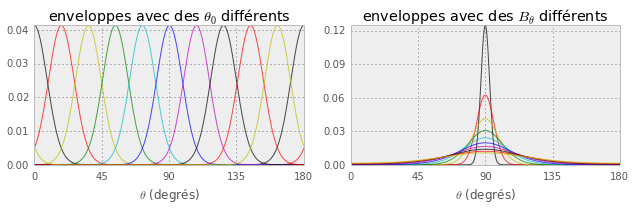

In [3]:
N_theta = 360
N_gabor, xmax = 100, np.pi
dx = xmax / N_gabor # taille d'un bin = périmetre divisé par nombre de bins

theta = np.linspace(0., np.pi, N_theta)
theta_out = np.linspace(0., np.pi, N_gabor)

def envelope_orientation(theta, theta_0=np.pi/2, B_theta=0.3, N_theta=N_theta):
    env =  np.exp(np.cos(2*(theta-theta_0))/B_theta**2)
    return (dx/(2*np.pi*iv(0, (1/((B_theta)**2)))))*env


# 10 enveloppes avec des theta_0 différents
fig, ax = plt.subplots(1, 2, figsize=(fig_width, fig_width*6/18.))
for theta_0, color in zip(theta[::36], ['k', 'r', 'y', 'g', 'c', 'b', 'm', 'k', 'r', 'y',  'g']):
    ax[0].plot(theta*180/np.pi, envelope_orientation(theta, theta_0=theta_0), color, alpha=.7)
ax[0].axis('tight')
ax[0].set_xlabel(r'$\theta$ ' u'(degrés)')
ax[0].set_yticks(np.linspace(0, 0.04, 5))
ax[0].set_xticks(np.linspace(0, 180, 5))

B_theta = np.linspace(.1, 1, 10)
# 10 enveloppes avec des B_theta différents
for B_theta, color in zip(B_theta[:], ['k', 'r', 'y', 'g', 'c', 'b', 'm', 'k', 'r', 'y',  'g']):
    ax[1].plot(theta*180/np.pi, envelope_orientation(theta, B_theta=B_theta), color, alpha=.7)
ax[1].axis('tight')
ax[1].set_xlabel(r'$\theta$ ' u'(degrés)')
ax[1].set_yticks(np.linspace(0, 0.12, 5))
ax[1].set_xticks(np.linspace(0, 180, 5))
ax[0].set_title(u'enveloppes avec des ' r'$\theta_{0}$ ' u'différents')
_= ax[1].set_title(u'enveloppes avec des ' r'$B_{\theta}$ ' u'différents')
plt.tight_layout()
fig.savefig('figures/enveloppes_theta0_et_B_theta(week5).pdf')

In [4]:
#  réalisation du motion clouds en 1D
#def texture(env):
# return np.fft.fft2(np.fft.ifftshift(env * np.exp(1j * 2 * np.pi * np.random.rand(mc.N_X, mc.N_Y)))).real

#def impulse(env):
# return np.fft.fft2(np.fft.ifftshift(env * np.exp(1j * 2 * np.pi * np.random.rand(mc.N_X, mc.N_Y)))).real

#I = texture(env)

env = envelope_orientation(theta)

## comparaison avec simulation de la convolution entre des von Mises

In [5]:
#np.convolve?

(0.0, 3.1101767270538954, 3.7362467083043403e-86, 1.9894367886486917)

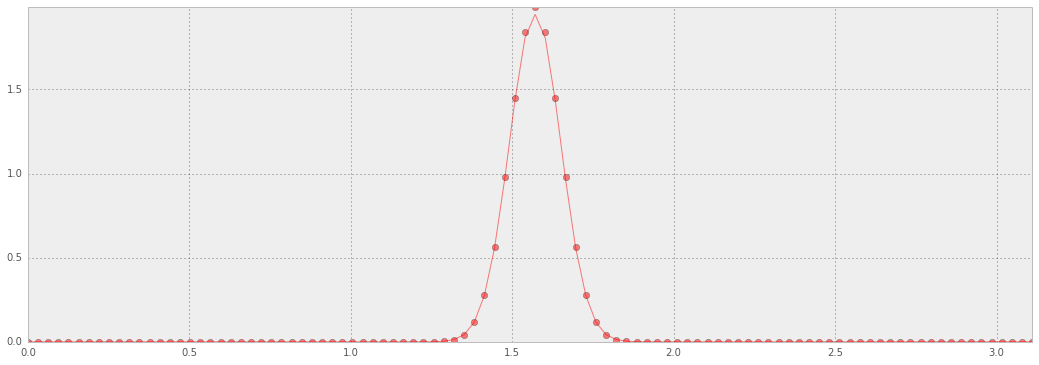

In [6]:
def gain_conv(m1, m2, sigma1, sigma2):
    texture = envelope_orientation(theta, theta_0=m1, B_theta=sigma1)
    gabor = envelope_orientation(theta, theta_0=m2, B_theta=sigma2)
    return (texture*gabor/dx).max()

# Montrons pour une  texture le profil de l'énergie d'entrée au ring
m_input, sigma_input = np.pi/2, .2
m_gabor, sigma_gabor = np.linspace (0, np.pi, N_gabor, endpoint=False), .1

Convo_sim = np.zeros((N_gabor))
for i, m_gabor_ in enumerate(m_gabor):
    Convo_sim[i] = gain_conv(m_input, m_gabor_, sigma_input, sigma_gabor)

p = (dx/(2*np.pi*sigma_input*sigma_gabor))*np.exp(-2*((m_gabor-m_input)**2)/(sigma_input**2+sigma_gabor**2))

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(m_gabor, (Convo_sim**2)/dx, 'r', alpha=0.5)
ax.plot(m_gabor, (p**2)/dx, 'ro', alpha=0.5)
ax.axis('tight')

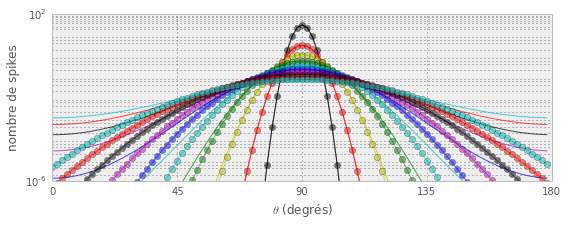

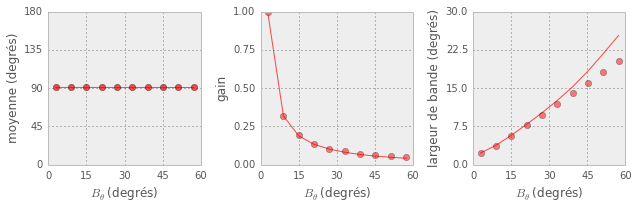

In [7]:
# Profil d'énergie d'entrée au ring pour des textures avec bandwidths qui augmentent

sigma_input = np.linspace(0.05, 1., 10)

sigma_output = np.zeros(sigma_input.shape)
mean_output = np.zeros(sigma_input.shape)
gain_output = np.zeros(sigma_input.shape)

sigma_p = np.zeros(sigma_input.shape)
gain_p = np.zeros(sigma_input.shape)
mean_p = np.zeros(sigma_input.shape)

fig, ax = plt.subplots(figsize=(fig_width, fig_width*6/18))
for i_sigma, (sigma_input_, color) in enumerate(zip(sigma_input, ['k', 'r', 'y', 'g', 'c', 'b', 'm', 'k', 'r', 'c',  'g'])):
    Convo_sim = np.zeros((N_gabor))
    for i, m_gabor_ in enumerate(m_gabor):
        Convo_sim[i] = gain_conv(m_input, m_gabor_, sigma_input_, sigma_gabor)
    p = (dx/(2*np.pi*sigma_input_*sigma_gabor))*np.exp(-2*((m_gabor-m_input)**2)/(sigma_input_**2+sigma_gabor**2))
    gain_output[i_sigma] = Convo_sim.max()
    mean_output[i_sigma] = np.sum((Convo_sim**2)*theta_out)/np.sum((Convo_sim**2))
    sigma_output[i_sigma] = np.sqrt(np.sum((Convo_sim**2)*(theta_out-mean_output[i_sigma])**2)/np.sum((Convo_sim**2))) # Convo_sim.std()/N_theta*np.pi
    mean_p[i_sigma] = np.sum((p**2)*theta_out)/np.sum(p**2)
    gain_p[i_sigma] = p.max()
    ax.semilogy(m_gabor*180/np.pi, (Convo_sim**2)/dx, color, alpha=0.7)
    ax.semilogy(m_gabor*180/np.pi, (p**2)/dx, color, marker='o', alpha=0.5)

ax.set_xlim([0, 180])
ax.set_ylim([1e-6, 100.])
ax.set_xticks(np.linspace(0, 180, 5))
ax.set_yticks(np.linspace(1e-6, 100, 5))
#plt.tight_layout()
ax.set_xlabel(r'$\theta$ ' u'(degrés)')
ax.set_ylabel(r'nombre de spikes')
#ax.set_title(u"Profil d'énergie d'entrée au ring pour des textures avec bandwidths qui augmentent")
fig.savefig('figures/chapeau(week5).pdf')

fig, ax = plt.subplots(1, 3, figsize=(fig_width, fig_width*6/18))

ax[0].plot(sigma_input*180/np.pi, mean_output*180/np.pi, 'r', alpha=0.7)
ax[0].plot(sigma_input*180/np.pi, mean_p*180/np.pi, 'ro', alpha=0.7)
#ax[0].set_ylim([0, 1.])
ax[0].set_yticks(np.linspace(0, 180, 5))
ax[0].set_xticks(np.linspace(0., 60., 5))

ax[1].plot(sigma_input*180/np.pi, gain_output, 'r', alpha=0.7)
ax[1].plot(sigma_input*180/np.pi, gain_p, 'ro', alpha=0.5)
ax[1].set_yticks(np.linspace(0, 1, 5))
ax[1].set_xticks(np.linspace(0., 60., 5))

ax[2].plot(sigma_input*180/np.pi, sigma_output*180/np.pi, 'r', alpha=0.7)
ax[2].plot(sigma_input*180/np.pi, np.sqrt(.25/2*(sigma_input**2+sigma_gabor**2))*180/np.pi, 'ro', alpha=0.5)
ax[2].set_yticks(np.linspace(0, 30, 5))
ax[2].set_xticks(np.linspace(0, 60., 5))

#ax[0].axis('tight')
ax[0].set_xlabel(r'$B_{\theta}$ ' u'(degrés)')
ax[0].set_ylabel(u'moyenne (degrés)')
#ax[1].axis('tight')
ax[1].set_xlabel(r'$B_{\theta}$ ' u'(degrés)')
ax[1].set_ylabel(r'gain')
#ax[2].axis('tight')
ax[2].set_xlabel(r'$B_{\theta}$ ' u'(degrés)')
_= ax[2].set_ylabel(u'largeur de bande (degrés)')
plt.tight_layout()
fig.savefig('figures/gain_sigmaoutput_sigmainput(week5).pdf')


In [8]:
print sigma_input.shape, gain_output.shape

(10,) (10,)


In [9]:
sigma_output

array([ 0.04014234,  0.06618251,  0.10056965,  0.13787231,  0.17737112,
        0.21961508,  0.26632765,  0.31986523,  0.37991982,  0.44222542])

In [10]:
print np.sum(Convo_sim), np.sum((Convo_sim**2)*theta_out), np.sum((Convo_sim**2))

1.99404981453 0.0895808380502 0.0564921528543


In [11]:
print mean_output, sigma_output

[ 1.58666296  1.58666296  1.58666296  1.58666296  1.58666295  1.58666237
  1.58664791  1.58655362  1.58626786  1.5857218 ] [ 0.04014234  0.06618251  0.10056965  0.13787231  0.17737112  0.21961508
  0.26632765  0.31986523  0.37991982  0.44222542]


## Résumé

Nous observons que les courbes de la simulation d'un von Mises sont similaire à celle de la prédiction.

Le gain diminue et le $\sigma_{output}$ augmente quand le $\sigma_{input}$ augmente

On observe un décalage entre les deux courbes sur la figure montrant le $\sigma_{output}$ en fonction du $\sigma_{input}$, cela est dut à l'aproximation dans le calcule du $\sigma_{output}$ pour la simulation du von Mises